# Introduction

This notebook is dedicated to calculating and predicting the price of diamonds using the "Price" column as the target variable (or 'y'). The target column is a continuous variable representing the price of diamonds. The primary goal is to build and evaluate models that can accurately predict the average price of diamonds based on various features in the dataset.

To achieve this, we will use three machine learning models that are based on tree algorithms:
1. **Ridge Regression**
2. **Polynomial Features Regression**
2. **Random Forrest Regressor**

Regression-based models are particularly well-suited for this type of regression problem due to their ability to handle complex relationships between features and their robustness to different types of data distributions. Furthermore, Tree-based models are particularly well-suited for this type of regression problem due to their ability to handle complex relationships between features and their robustness to different types of data distributions.

Using these machine learning models, the workflow will follow these steps:

- **Load Data:** Import the dataset and perform initial data inspection to understand its structure and contents.
- **Data Preprocessing:** Clean the data by handling missing values, encoding categorical variables, and normalizing numerical features where necessary.

- **Train-Test Split:** Divide the dataset into training and testing sets to evaluate model performance.
- **Model Training:** Train the CatBoost and Random Forest models using the training data.
- **Model Evaluation:** Assess the performance of the trained models using various metrics.
- **Model Tuning:** Optimize model hyperparameters to improve accuracy and other performance metrics.
- **Feature Importances:** Identify and rank the features based on their importance in predicting the target variable.
- **Final Evaluation:** Conduct a final evaluation of the tuned models on the test data.

For evaluating the performance of the models, the following metrics will be used:

- **Mean Absolute Error (MAE):** The average of the absolute differences between the predicted and actual values.
- **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values.
- **R-squared (R²):** A statistical measure that represents the proportion of the variance for the target variable explained by the features.
- **Root Mean Squared Error (RMSE):** The square root of the average of the squared differences between the predicted and actual values.

By following these steps, we aim to develop robust models that can accurately predict diamond prices, aiding jewelers and retailers in setting competitive prices and optimizing their pricing strategies.

In [1]:
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
/opt/conda/bin/nvcc


In [2]:
!python --version
!nvidia-smi

Python 3.10.13
Tue Jul 16 14:47:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+--------------------------------

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# Importing Libraries

In [4]:
# importing libraries fundamentals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib import pyplot
import plotly.express as px

# Library for Null Values Imputing
import missingno as msno

# Library for Encoding and Imputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Library for Machine Learning Frameworks
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


# Loading the Dataset

In [6]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

## Dataset Information

In [7]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df = X = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.describe()
# description of dataset

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.shape
# Dataset has 119390 rows and 32 columns

(53940, 10)

In [13]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['cut', 'color', 'clarity'], dtype='object')


In [16]:
for col in cat_cols:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Counts for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Counts for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [15]:
num_cols = df.select_dtypes(include=['float', 'int64']).columns
print(num_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


## Dealt with Null Values



In [16]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Empty DataFrame


# Split Data

In [17]:
X = df.drop(['price'], axis=1)
y = df['price']

# Preprocessing (Scaling, Encoding & PCA)

In [18]:
list_num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
list_cat_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list_num_cols),
        ('cat', OneHotEncoder(), list_cat_cols)
    ])

In [19]:
X_transformed = preprocessor.fit_transform(X)

# PCA (Dimensionality Reduction)

## Elbow Method

Find the best dimensions

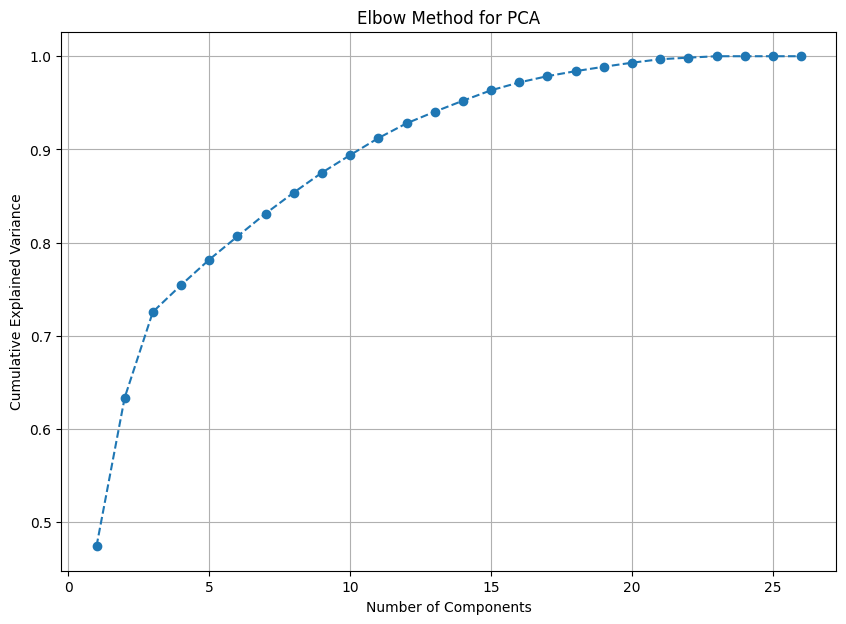

In [20]:
pca = PCA()
pca.fit(X_transformed)

# Calculate explained variance ratio for each number of components
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

## Perform PCA

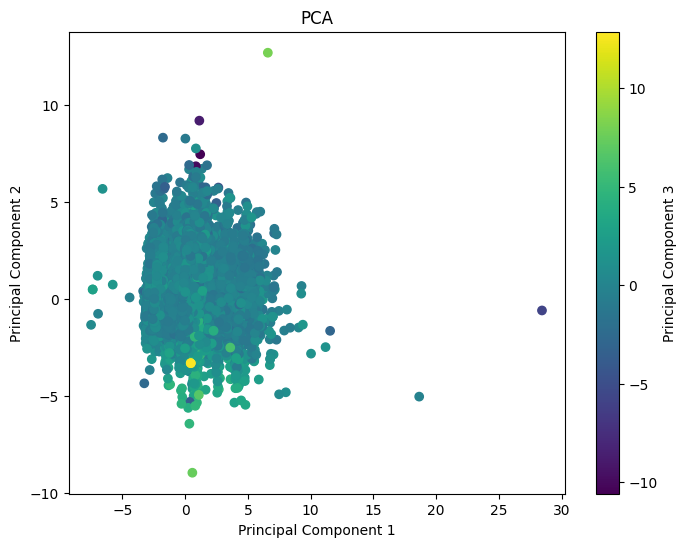

In [21]:
def perform_pca(X_transformed):
    pca = PCA(n_components=4)
    X_pca = pca.fit_transform(X_transformed)
    return X_pca

X_pca = perform_pca(X_transformed)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 2])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Principal Component 3')
plt.show()

### Split Train Test Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 4), (10788, 4), (43152,), (10788,))

# Machine Learning Models

## Ridge Regression

### Build Model

In [24]:
ridge_model = Ridge(alpha=1000) 
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

mean_value = df['price'].mean()
print('Mean:', mean_value)
print('MAE:', mean_absolute_error(ridge_pred, y_test))
print('MSE:', mean_squared_error(ridge_pred, y_test))
print('R-Squared:', r2_score(ridge_pred, y_test))

Mean: 3932.799721913237
MAE: 1253.954014900516
MSE: 3041467.45870282
R-Squared: 0.760382022882002


### Hypeparameter Tuning

In [25]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000,0],
}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)

print("Best Parameters:", grid_search_ridge.best_params_)
best_score = np.sqrt(-grid_search_ridge.best_score_)
print("Best Score (RMSE):", best_score)

Best Parameters: {'alpha': 10.0}
Best Score (RMSE): 1778.9670336580293


### Model Overview

In [26]:
best_model_ridge = grid_search_ridge.best_estimator_
best_pred_ridge = best_model_ridge.predict(X_test)

print('MAE:', mean_absolute_error(best_pred_ridge, y_test))
print('MSE:', mean_squared_error(best_pred_ridge, y_test))
print('R-Squared:', r2_score(best_pred_ridge, y_test))

MAE: 1258.0427921220457
MSE: 3039692.593570783
R-Squared: 0.76349955463416


## Polynomial Features Regression

### Build Model

In [27]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
mode_poly = LinearRegression()
mode_poly.fit(X_train_poly, y_train)
poly_pred = mode_poly.predict(X_test_poly)

print('MAE:', mean_absolute_error(poly_pred, y_test))
print('MSE:', mean_squared_error(poly_pred, y_test))
print('R-Squared:', r2_score(poly_pred, y_test))

MAE: 1076.8308012915136
MSE: 2554785.206015888
R-Squared: 0.8028434831343443


In [28]:
pipeline_poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

poly_params = {
    'poly_features__degree': [1, 2, 3, 4, 5], 
    'linear_regression__fit_intercept': [True, False],
}


grid_search_poly = GridSearchCV(pipeline_poly, 
                                poly_params, 
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                n_jobs=-1)

grid_search_poly.fit(X_train, y_train)

print("Best Parameters:", grid_search_poly.best_params_)
best_score = np.sqrt(-grid_search_poly.best_score_)
print("Best Score (RMSE):", best_score)

Best Parameters: {'linear_regression__fit_intercept': True, 'poly_features__degree': 1}
Best Score (RMSE): 1778.967255805024


In [29]:
best_model_poly = grid_search_poly.best_estimator_
best_pred_poly = best_model_poly.predict(X_test)

print('MAE:', mean_absolute_error(best_pred_poly, y_test))
print('MSE:', mean_squared_error(best_pred_poly, y_test))
print('R-Squared:', r2_score(best_pred_poly, y_test))

MAE: 1258.0857147599977
MSE: 3039681.178365896
R-Squared: 0.7635305804337666


this one after tuning was getting worsed :(

## Random Forrest Regressor

### Build Model

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print('MAE:', mean_absolute_error(rf_pred, y_test))
print('MSE:', mean_squared_error(rf_pred, y_test))
print('R-Squared:', r2_score(rf_pred, y_test))

MAE: 642.1641891210693
MSE: 1458436.1584178545
R-Squared: 0.9002499421072495


### Hyperparameter Tuning

for this case, i dont use tuning. because of data is large dataset.

# Actual Y and Price Predict

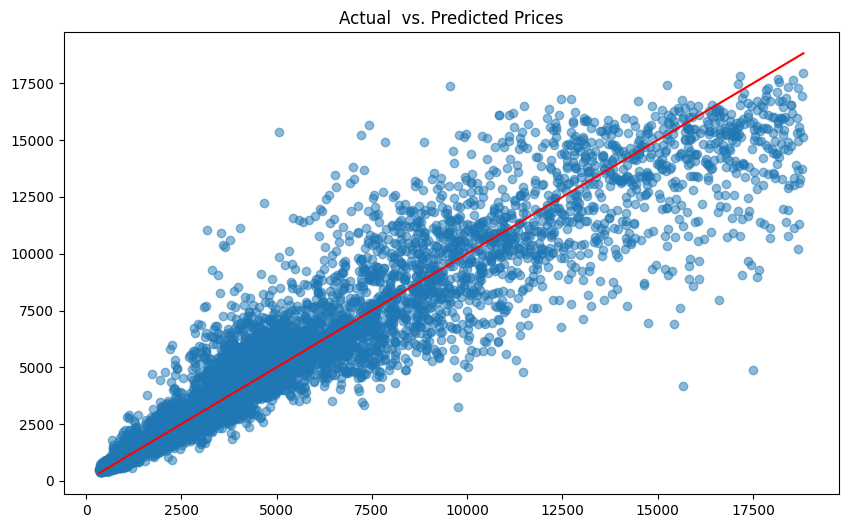

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Actual  vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

# Model Chooses

In [32]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Conclusion :

I think the model is good, from metrics, the values we got was:

**1. Ridge Regression**
- **Mean Absolute Error: 1258.04**
- **Mean Square Error: 3039692.59**
- **R-Squared: 0.76**

**2. Polynomial Features Regression**
- **Mean Absolute Error:** 1258.08**
- **Mean Square Error:** 3039681.178**
- **R-Squared: 0.76**

**3. Random Forrest Regressor**
- **Mean Absolute Error:** 642.16**
- **Mean Square Error:** 1458436.15**
- **R-Squared:** 0.90**

therefore, i take Random Forrest Classifier Regressor Model, because of the good values that got. MEA and MSE was lowest among all and R-Squared was the highest and almost **1.0**